# Imports

In [13]:
! pip install --quiet geopandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data import load_data_viz_data

import geopandas as gpd
from shapely.geometry import Point

from math import radians, sin, cos, asin, sqrt

You should consider upgrading via the '/Users/Charlotte/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


# Socio eco analysis

In [14]:
socio_df = pd.read_csv("data/boston_crimes_regression.csv")
socio_df

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston
5,39.4,38924,21.1,38.4,32744,1.9,13.8,21.3,E18,12551,Hyde Park
6,34.8,40867,32.5,33.7,51655,5.5,8.0,12.1,E13,12802,Jamaica Plain
7,36.7,26659,20.9,29.8,28356,2.3,14.5,22.9,B3,28331,Mattapan
8,32.5,54161,27.8,17.8,20978,2.9,23.0,18.9,B2,38877,Roxbury
9,31.9,36772,46.1,24.7,64745,2.4,7.9,8.4,C6,16617,South Boston


# Incidents map

In [15]:
df = load_data_viz_data()
df[['LAT','LONG']] = df[['LAT','LONG']].astype('float64')
df = df.drop_duplicates()

df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
5,I172075854,Fraud and law violations,0,2015-09-02 09:00:00,42.314013,-71.086353,Roxbury,42.328894,-71.085359


In [16]:
df.describe()

,SHOOTING,LAT,LONG,LAT_POLICE_STATION,LONG_POLICE_STATION
count,225884.000000,225884.000000,225884.000000,225884.000000,225884.000000
mean,0.004330,42.294142,-71.036722,42.322256,-71.082485
std,0.065658,1.105264,1.787479,0.030924,0.029507
min,0.000000,-1.000000,-71.178674,42.256476,-71.150600
25%,0.000000,42.297555,-71.095889,42.298068,-71.091600
50%,0.000000,42.325677,-71.077513,42.328894,-71.069161
75%,0.000000,42.348624,-71.062570,42.341200,-71.060300
max,1.000000,42.395042,-1.000000,42.371200,-71.038700


In [17]:
# removing LAT == -1 and LONG == -1
df = df[df["LAT"] != -1.]
df.describe()

,SHOOTING,LAT,LONG,LAT_POLICE_STATION,LONG_POLICE_STATION
count,225737.000000,225737.000000,225737.000000,225737.000000,225737.000000
mean,0.004332,42.322335,-71.082330,42.322245,-71.082492
std,0.065679,0.031687,0.028935,0.030924,0.029504
min,0.000000,42.232413,-71.178674,42.256476,-71.150600
25%,0.000000,42.297557,-71.095893,42.298068,-71.091600
50%,0.000000,42.325730,-71.077526,42.328894,-71.069161
75%,0.000000,42.348624,-71.062583,42.341200,-71.060300
max,1.000000,42.395042,-70.963676,42.371200,-71.038700


In [18]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
5,I172075854,Fraud and law violations,0,2015-09-02 09:00:00,42.314013,-71.086353,Roxbury,42.328894,-71.085359


In [44]:
police_st = df[["NAME", "LAT_POLICE_STATION", "LONG_POLICE_STATION"]].copy().drop_duplicates().reset_index(drop=True)
police_st

,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,Roxbury,42.328894,-71.085359
1,Dorchester,42.298068,-71.059141
2,Downtown,42.361800,-71.060300
3,Hyde Park,42.256476,-71.124279
4,South End,42.339629,-71.069161
5,Mattapan,42.284800,-71.091600
6,Brighton,42.349300,-71.150600
7,East Boston,42.371200,-71.038700
8,West Roxbury,42.286800,-71.148400
9,South Boston,42.341200,-71.054900


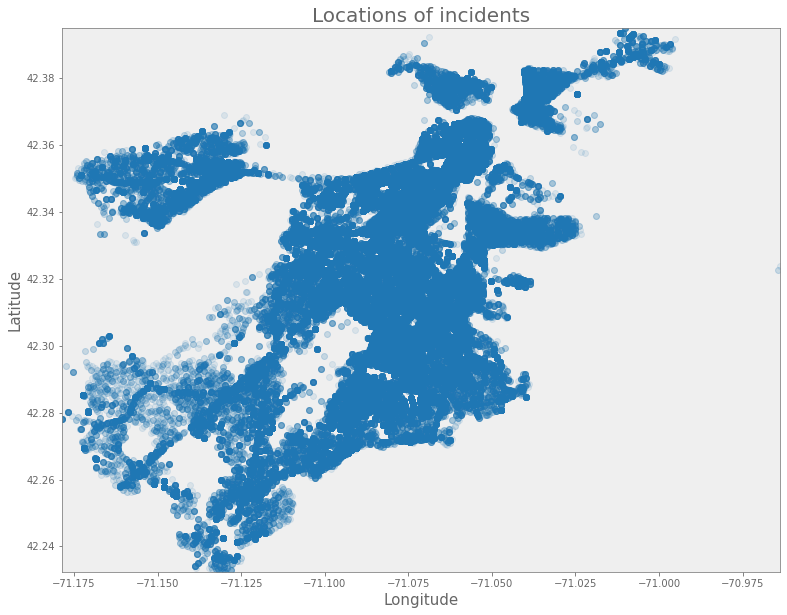

In [37]:
# Get map
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create geometry
geometry = [Point(xy) for xy in zip(df["LONG"], df["LAT"])]

# Geo Dataframe
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plot
fig, ax = plt.subplots(figsize = (15, 10))
world_map.plot(ax=ax, alpha=0.4, color="#d9d9d9")
geo_df.plot(ax=ax, alpha=0.1)
    
#plt.axis()
#plt.xticks([], [])
#plt.yticks([], [])


plt.xlabel('Longitude', fontsize=15, color='#666666')
plt.ylabel('Latitude', fontsize=15, color='#666666')
plt.title('Locations of incidents', fontsize=20, color='#666666')

# ax = plt.gca()

ax.set_xlim((df['LONG'].min(), df['LONG'].max()))
ax.set_ylim((df['LAT'].min(), df['LAT'].max()))

ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_color('grey')

ax.tick_params(colors='#666666');

# Incidents per district

In [27]:
incidents_df1 = geo_df[["NAME", "OFFENSE_CODE_GROUP", "INCIDENT_NUMBER"]].copy()

incidents_df1 = incidents_df1.groupby(["NAME", "OFFENSE_CODE_GROUP"]).\
    count().sort_values(by=["NAME", "INCIDENT_NUMBER"], ascending=[True, False]).reset_index()

incidents_df1

,NAME,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
0,Brighton,Larceny and vandalism,5065
1,Brighton,Police investigation procedure,2760
2,Brighton,Fraud and law violations,1742
3,Brighton,Violence and harassment,1558
4,Brighton,Other,911
...,...,...,...
79,West Roxbury,Fraud and law violations,1112
80,West Roxbury,Violence and harassment,1031
81,West Roxbury,Other,863
82,West Roxbury,Disputes,596


In [47]:
incidents_df1.merge(police_st, on="NAME")

,NAME,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,LAT_POLICE_STATION,LONG_POLICE_STATION
0,Brighton,Larceny and vandalism,5065,42.3493,-71.1506
1,Brighton,Police investigation procedure,2760,42.3493,-71.1506
2,Brighton,Fraud and law violations,1742,42.3493,-71.1506
3,Brighton,Violence and harassment,1558,42.3493,-71.1506
4,Brighton,Other,911,42.3493,-71.1506
...,...,...,...,...,...
79,West Roxbury,Fraud and law violations,1112,42.2868,-71.1484
80,West Roxbury,Violence and harassment,1031,42.2868,-71.1484
81,West Roxbury,Other,863,42.2868,-71.1484
82,West Roxbury,Disputes,596,42.2868,-71.1484


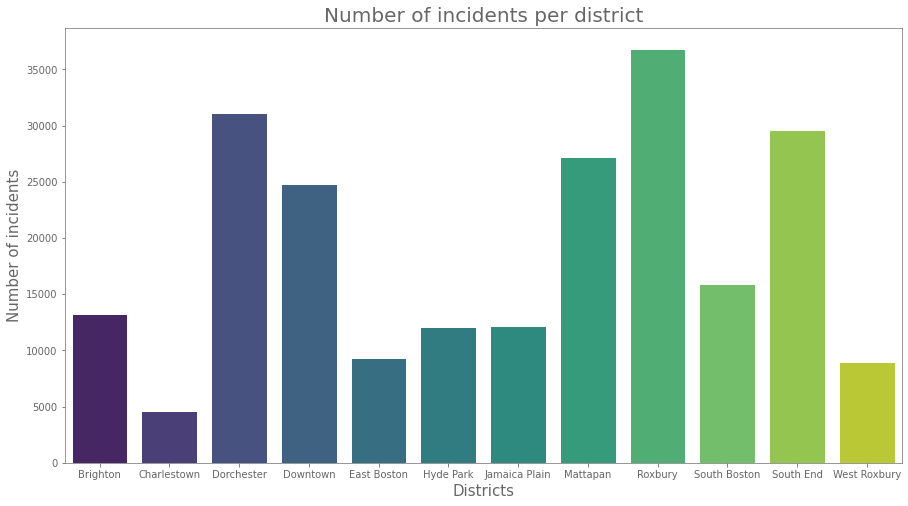

In [38]:
plt.figure(figsize=(15, 8))

sns.barplot(data=incidents_df1.groupby("NAME").sum().reset_index(), 
            x='NAME',
            y='INCIDENT_NUMBER',
            palette='viridis', 
            edgecolor="white")

plt.xlabel('Districts', fontsize=15, color='#666666')
plt.ylabel('Number of incidents', fontsize=15, color='#666666')
plt.title('Number of incidents per district', fontsize=20, color='#666666')

ax = plt.gca()

ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_color('grey')

ax.tick_params(colors='#666666');

# With incidents types

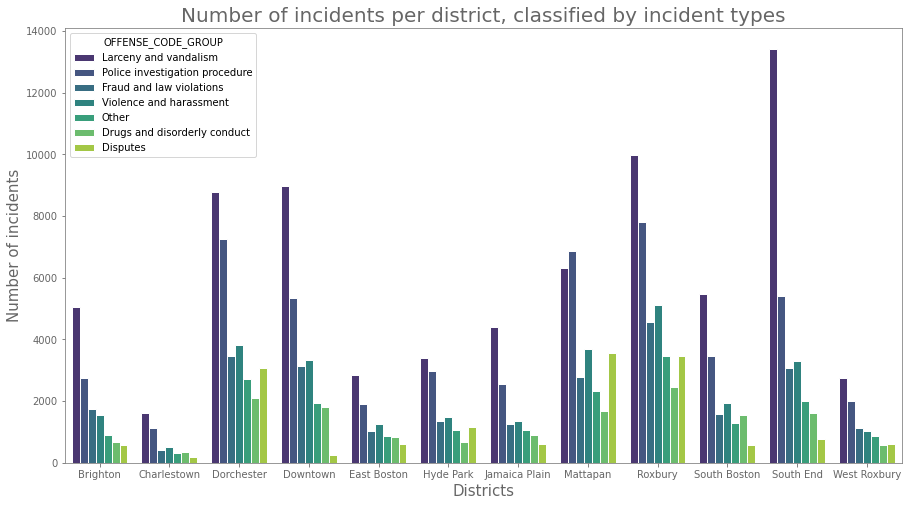

In [39]:
plt.figure(figsize=(15, 8))

sns.barplot(data=incidents_df1, 
            x='NAME',
            y='INCIDENT_NUMBER',
             hue='OFFENSE_CODE_GROUP',
             palette='viridis', 
             edgecolor="white")

plt.xlabel('Districts', fontsize=15, color='#666666')
plt.ylabel('Number of incidents', fontsize=15, color='#666666')
plt.title('Number of incidents per district, classified by incident types', fontsize=20, color='#666666')

ax = plt.gca()

ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_color('grey')

ax.tick_params(colors='#666666');

# Locations analysis

In [41]:
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

distance_df = geo_df[["NAME", "INCIDENT_NUMBER", "LAT", 
                    "LONG", "LAT_POLICE_STATION", "LONG_POLICE_STATION"]].copy()

distance_df["POLICE_ST_DISTANCE"] = distance_df.apply(
    lambda df: haversine_distance(df.LONG, df.LAT, df.LONG_POLICE_STATION, df.LAT_POLICE_STATION),
    axis=1
)

distance_df = distance_df[["NAME", "INCIDENT_NUMBER", "POLICE_ST_DISTANCE"]]

distance_df.head()

,NAME,INCIDENT_NUMBER,POLICE_ST_DISTANCE
0,Roxbury,I192068249,0.163832
1,Roxbury,I182074094,2.145919
2,Roxbury,I182054888,2.021175
3,Roxbury,I182054888,2.021175
5,Roxbury,I172075854,1.656718


In [59]:
average_distance_df = distance_df.groupby("NAME")[["POLICE_ST_DISTANCE"]].mean().reset_index()

average_distance_df

,NAME,POLICE_ST_DISTANCE
0,Brighton,1.313056
1,Charlestown,1.938616
2,Dorchester,1.367756
3,Downtown,0.854843
4,East Boston,1.203011
5,Hyde Park,1.723105
6,Jamaica Plain,1.264734
7,Mattapan,1.310414
8,Roxbury,1.463647
9,South Boston,1.411748


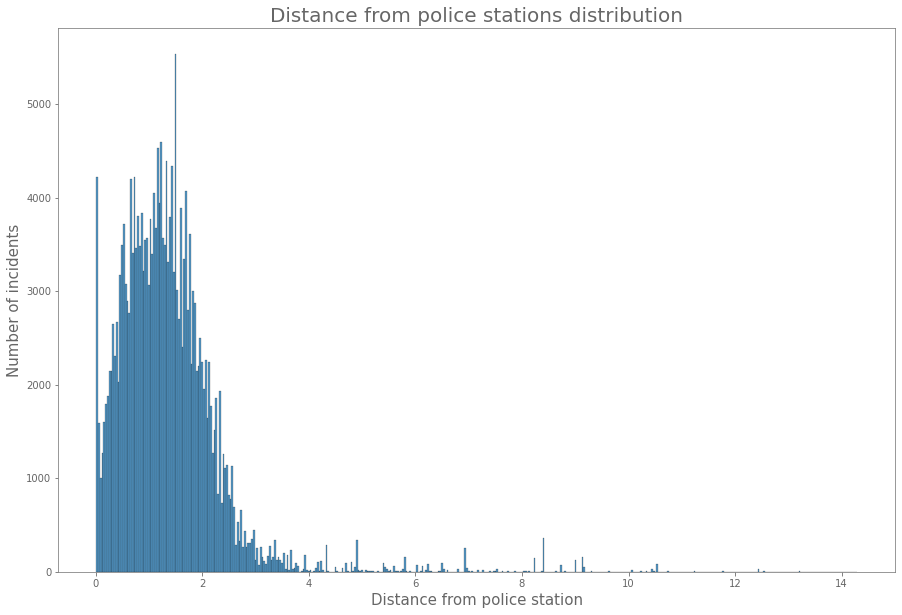

In [54]:
plt.figure(figsize=(15,10))

sns.histplot(
    data=distance_df,
    x="POLICE_ST_DISTANCE")

plt.xlabel('Distance from police station', fontsize=15, color='#666666')
plt.ylabel('Number of incidents', fontsize=15, color='#666666')
plt.title('Distance from police stations distribution', fontsize=20, color='#666666')

ax = plt.gca()

ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_color('grey')

ax.tick_params(colors='#666666');

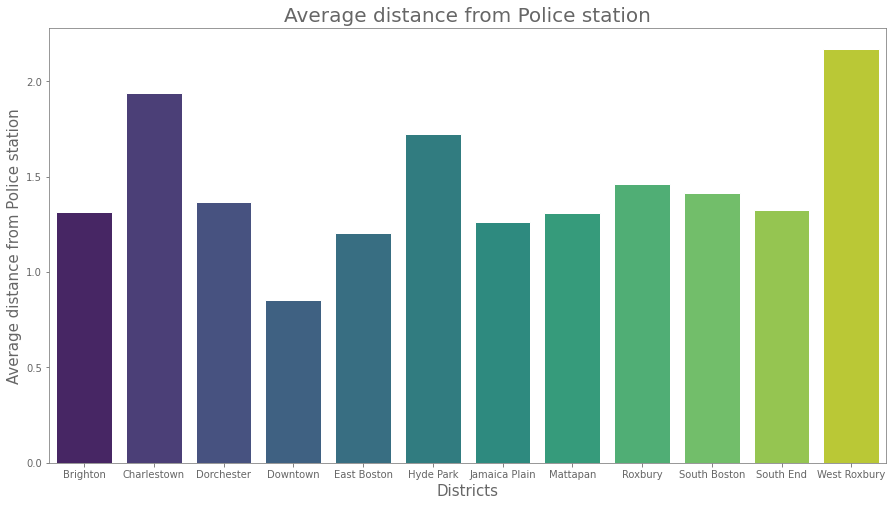

In [61]:
plt.figure(figsize=(15, 8))

sns.barplot(data=average_distance_df,
            x="NAME",
            y="POLICE_ST_DISTANCE",
            palette='viridis', 
            edgecolor="white")

plt.xlabel('Districts', fontsize=15, color='#666666')
plt.ylabel('Average distance from Police station', fontsize=15, color='#666666')
plt.title('Average distance from Police station', fontsize=20, color='#666666')

ax = plt.gca()

ax.spines['left'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['right'].set_color('grey')

ax.tick_params(colors='#666666');